In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

y= cancer['target']
X = cancer['data']

from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(X,y,random_state=0, stratify=y)


In [2]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(1.0, 0.9090909090909091)

In [3]:
model.feature_importances_

array([0.        , 0.04001905, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01101841, 0.        ,
       0.00243087, 0.00980366, 0.        , 0.00999282, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03687207, 0.02958161, 0.72534081, 0.        , 0.00931787,
       0.        , 0.        , 0.11268932, 0.        , 0.01293352])

<AxesSubplot: >

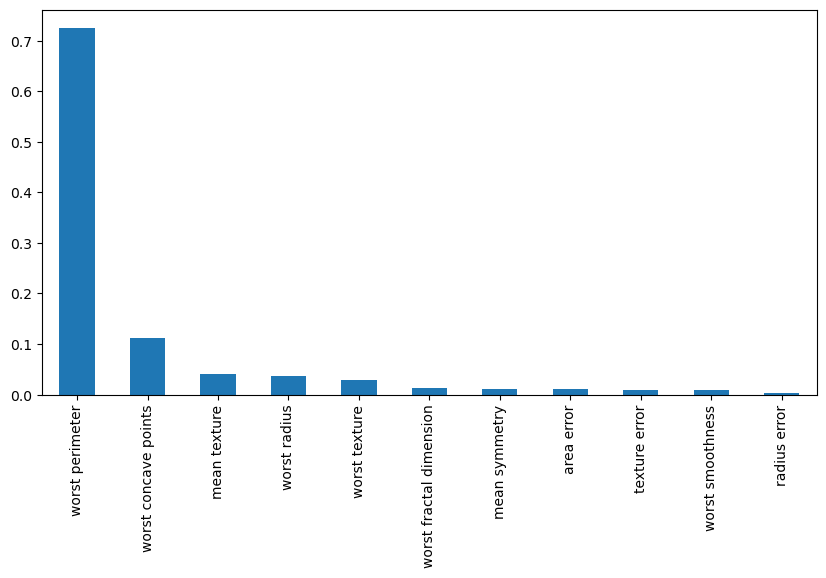

In [4]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=cancer['feature_names'])
fi[fi!=0].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [5]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [6]:
model.get_depth()

5

In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3).fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.9765258215962441, 0.9300699300699301)

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

y = cancer["target"]
X = cancer["data"]
cancer["target_names"]

from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X, y, random_state=0, stratify=y
)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_tr,y_tr)
print(model.score(x_tr,y_tr), model.score(x_te,y_te) )

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3).fit(x_tr,y_tr)
print(model.score(x_tr,y_tr), model.score(x_te,y_te) )


1.0 0.9020979020979021
0.9765258215962441 0.916083916083916


In [9]:
from sklearn.tree import export_graphviz
export_graphviz(model,  out_file='model3.dot',
                feature_names=cancer['feature_names'],
                class_names=cancer['target_names'], impurity=True, filled=True)


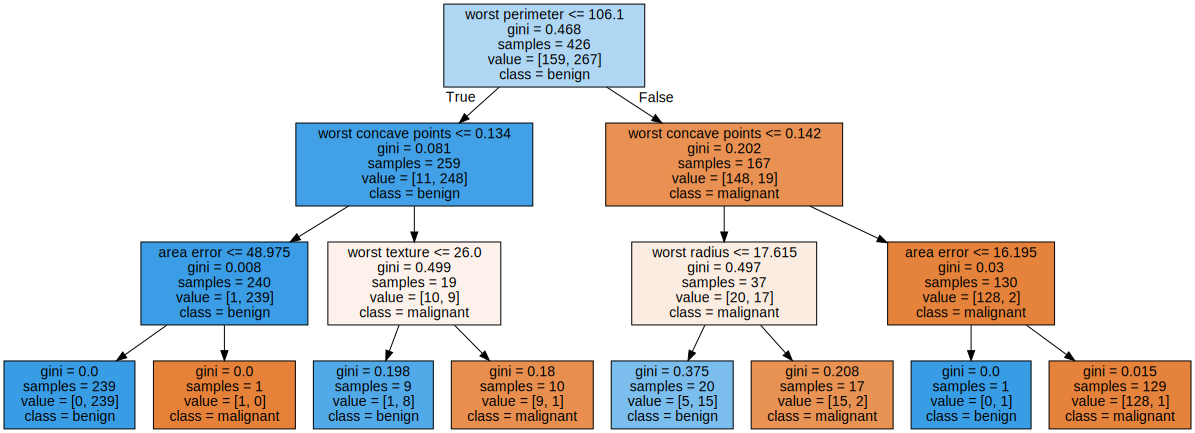

In [10]:
import graphviz
with open('model3.dot') as f:
    data = f.read()
graphviz.Source(data)


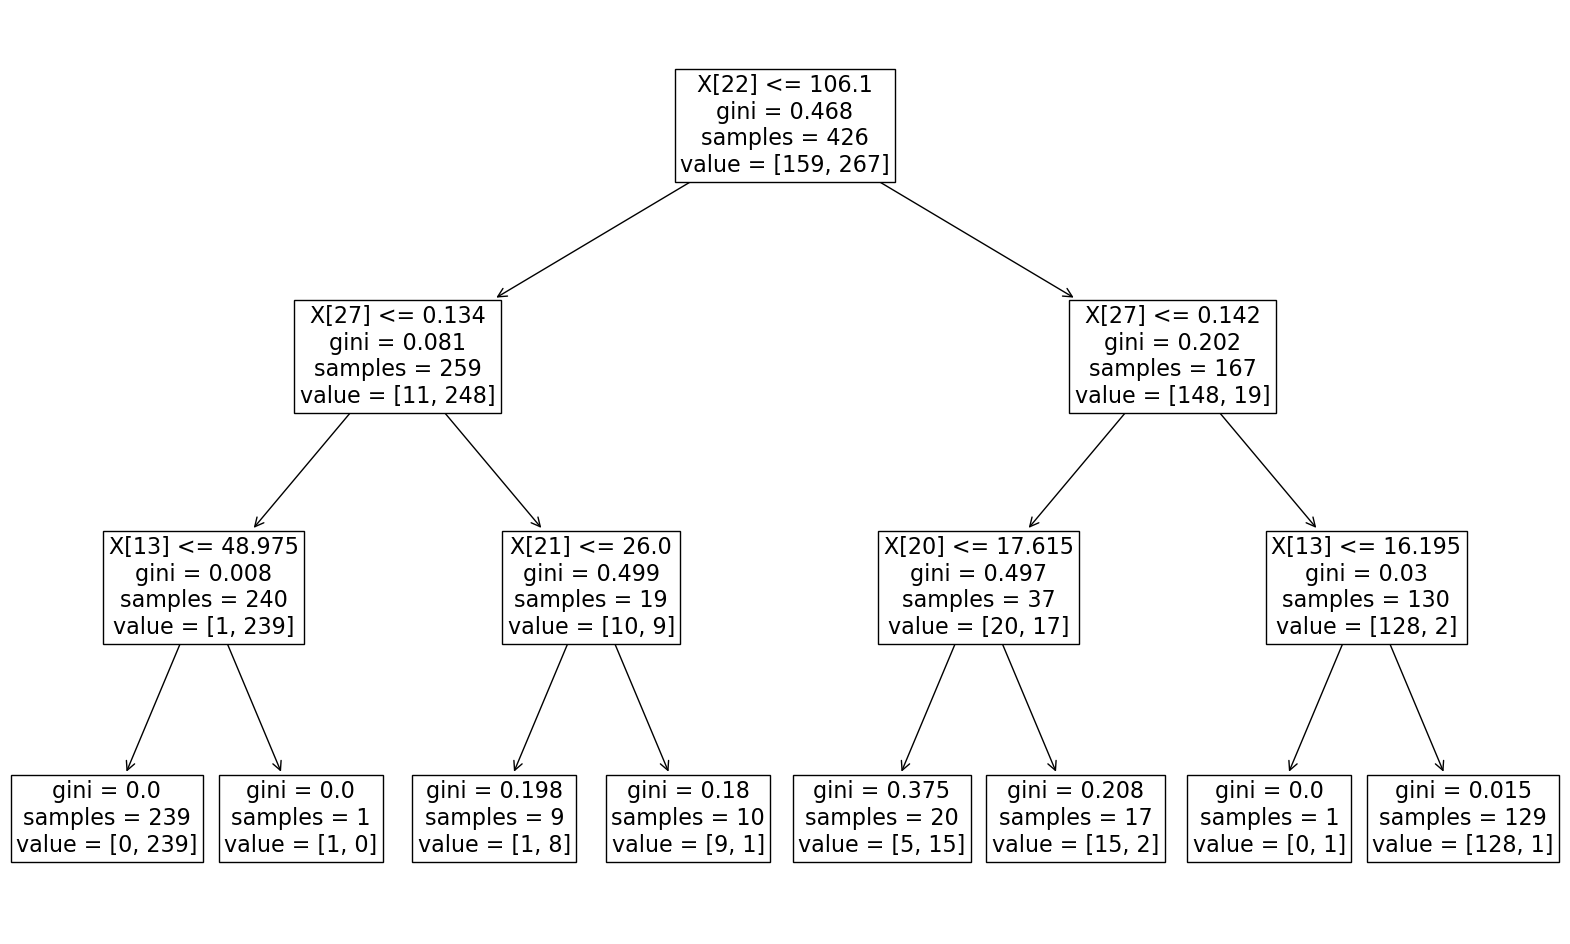

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))

from sklearn import tree
tree.plot_tree(model, fontsize=16)

plt.show()

In [22]:
from sklearn.datasets import load_boston
boston = load_boston()

y= boston['target']
X = boston['data']
y

/home/lsg/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [23]:
x_tr,x_te,y_tr,y_te = train_test_split(X,y, random_state=0)


In [24]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_tr,y_tr)
print(model.score(x_tr,y_tr), model.score(x_te,y_te) )

1.0 0.6646997440479581


In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(500,100))

from sklearn import tree
tree.plot_tree(model, fontsize=16)

plt.show()

<AxesSubplot: >

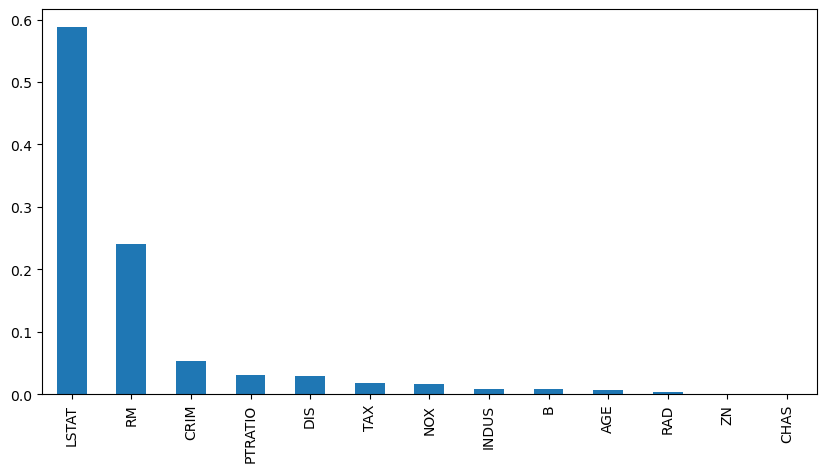

In [46]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=boston['feature_names'])
fi[fi!=0].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))